# Part 2.3: Prediction of the Sodium Adsorption Ratio using Supervised Learning Regression algorithms

#### Imports

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
# Set default font size
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
# Separate the data:
from sklearn.model_selection import train_test_split
# scaling values
from sklearn.preprocessing import MinMaxScaler
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#warnings
import warnings
warnings.filterwarnings("ignore")

#### Upload the file

Use the final dataset "chemical_WQI_ICI_stations.xlsx":

In [4]:
chemical_stations=pd.read_excel("chemical_WQI_ICI_stations.xlsx")
chemical_stations.head()

,POINT ID,DATE,River/Lake/Dam,Locality Description of Sample Station,Latitude (degrees),Longitude (degrees),Subdrainage Region,Drainage Region,YEAR,EC (μS/cm),PH,TDS (mg/L),Na (mg/L),Mg (mg/L),Ca (mg/L),F (mg/L),Cl (mg/L),NO2+NO3 (mg/L),SO4 (mg/L),PO4 (mg/L),TAL (CaCO3) (mg/L),Si (mg/L),K (mg/L),NH4 (mg/L),2[SO4],[Cl],SAR,HCO3 (mg/L),WQI,Class WQI,ICI (%),Class ICI,Class SAR
0,90160,1976-04-20,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,366.0,7.83,267.0,24.1,18.2,22.0,0.57,19.7,0.04,19.6,0.014,130.7,4.33,3.47,0.01,11.404165,15.514532,0.919854,158.380632,33.716337,Excellent,27.074050,Rock dominance,Very good water quality
1,90160,1976-04-27,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,380.0,7.78,280.0,25.6,19.2,22.8,0.57,19.0,0.04,20.4,0.004,138.3,4.06,3.54,0.02,11.395173,14.365124,0.954883,167.712993,34.836136,Excellent,25.891041,Rock dominance,Very good water quality
2,90160,1976-05-18,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,372.0,7.48,269.0,22.8,17.2,23.9,0.44,18.8,0.29,17.9,0.007,134.3,5.59,2.91,0.08,10.382320,14.759249,0.868154,163.351497,31.462083,Excellent,25.300708,Rock dominance,Very good water quality
3,90160,1976-05-25,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,367.0,7.43,269.0,22.9,17.9,23.8,0.48,19.4,0.39,18.1,0.004,132.7,5.46,3.03,0.08,10.530419,15.276851,0.863294,161.458381,32.372463,Excellent,25.991911,Rock dominance,Very good water quality
4,90160,1976-06-01,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,383.0,7.34,279.0,24.3,18.5,24.5,0.53,19.9,0.56,18.1,0.007,137.6,5.13,3.03,0.10,10.210491,15.194491,0.901894,167.504656,34.027075,Excellent,25.633347,Rock dominance,Very good water quality


#### Distribution of the target variable

Text(0.5, 1.0, 'Distribution of SAR')

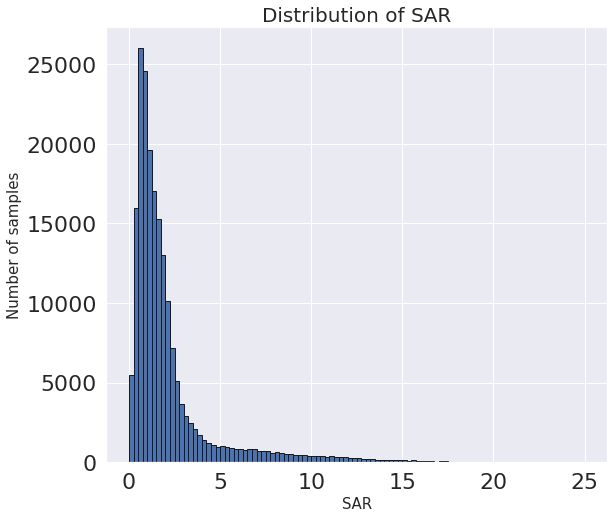

In [28]:
plt.figure (figsize = (8,8)) 
plt.hist(chemical_stations['SAR'], bins = 100, edgecolor = 'k');
plt.xlabel("SAR", size=15);
plt.ylabel("Number of samples", size=15);
plt.title("Distribution of SAR", size=20)

## Predictive variables: electrical conductivity, PH and latitude

## Treatment of  variables

#### Variable: Longitude/Latitude (Numerical variable)

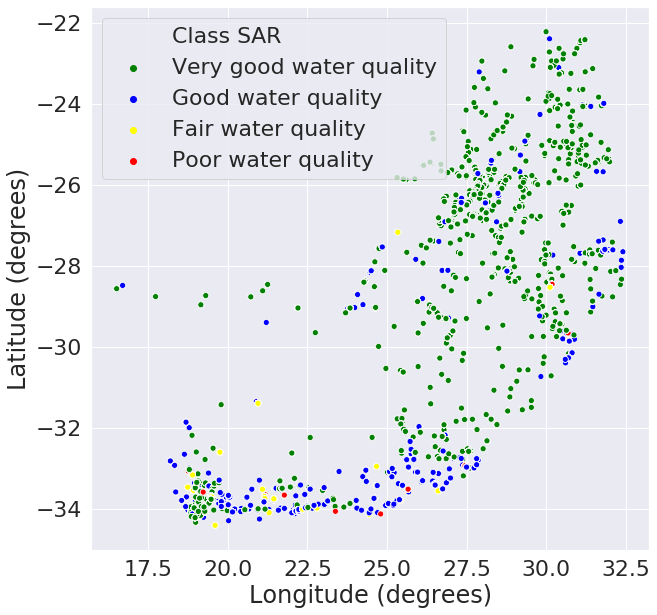

In [6]:
# See the map
plt.figure (figsize = (10,10)) 
sns.scatterplot (chemical_stations['Longitude (degrees)'], chemical_stations['Latitude (degrees)'], 
                 hue=chemical_stations["Class SAR"], palette=["green", "blue", "yellow", "red"])

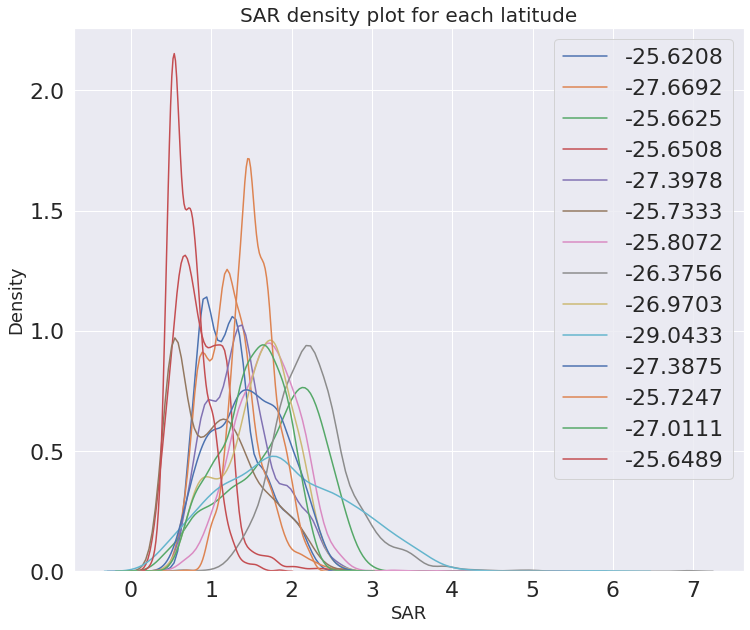

In [7]:
# Creation of a samples list with more than 1300 measurements
types =  chemical_stations.dropna(subset=['SAR'])
types = types['Latitude (degrees)'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Latitude (degrees)'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['SAR'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('SAR', size = 18); plt.ylabel('Density', size = 18); 
plt.title('SAR density plot for each latitude', size = 20);

Latitude has influence on the density of the SAR.

## Correlations between Features and Target

In [8]:
features_target=chemical_stations[['EC (μS/cm)','PH', "Latitude (degrees)", "Longitude (degrees)","SAR"]]

In [9]:
# Find the correlations
features_target.corr()['SAR']

EC (μS/cm)             0.898258
PH                     0.051264
Latitude (degrees)    -0.589896
Longitude (degrees)   -0.429466
SAR                    1.000000
Name: SAR, dtype: float64

### Relationship between EC and SAR

To visualize the relationship between Electrical Conductivity and SAR, I use a scatter plot. I'm going to use color to represent a third categorical variable: "Drainage Region"

Text(0.5, 1, 'SAR vs EC')

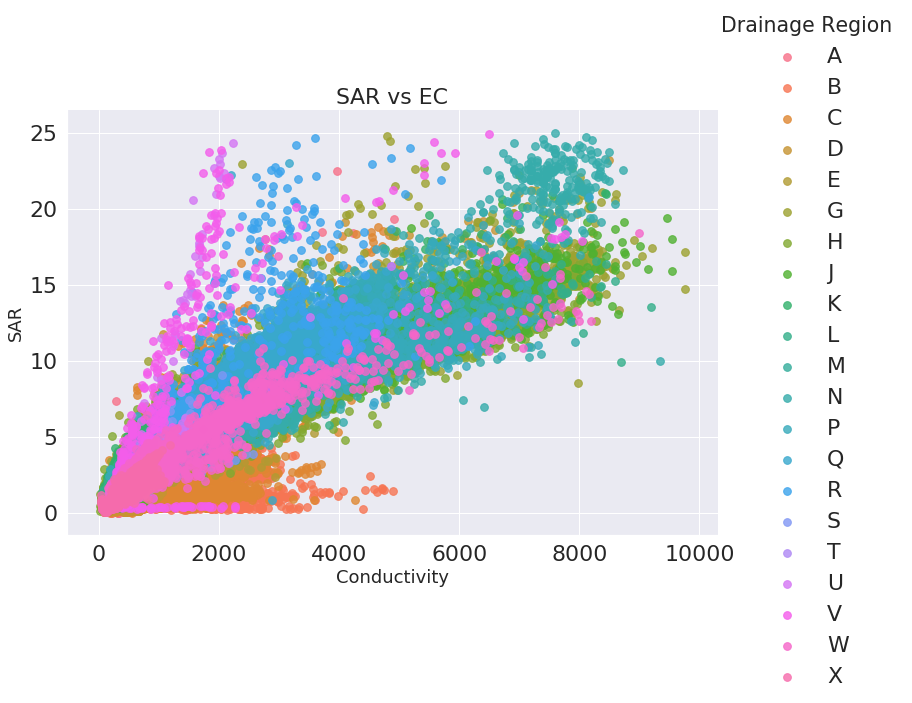

In [8]:
figsize(12, 10)

# Extract the building types
EC_SAR=chemical_stations[["Drainage Region", "SAR", "EC (μS/cm)"]]
EC_SAR["Drainage Region"]=chemical_stations.dropna(subset=["SAR"])["Drainage Region"]
# Use seaborn to plot a scatterplot of EC vs SAR
ax=sns.lmplot(x='EC (μS/cm)', y='SAR', 
          hue = 'Drainage Region', data = EC_SAR,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height=7, aspect = 1.5);

# Plot labeling
plt.xlabel("Conductivity", size = 18)
plt.ylabel('SAR', size = 18)
plt.title('SAR vs EC', size = 22)

In [5]:
# If regions A, B, C and V are removed:
regions_without_A_B_C_V=chemical_stations[(chemical_stations["Drainage Region"] != "A")&
                        (chemical_stations["Drainage Region"] != "B")&
                                     (chemical_stations["Drainage Region"]!="C")&
                                     (chemical_stations["Drainage Region"]!="V")]

Text(0.5, 1, 'SAR vs EC in the rest of the regions')

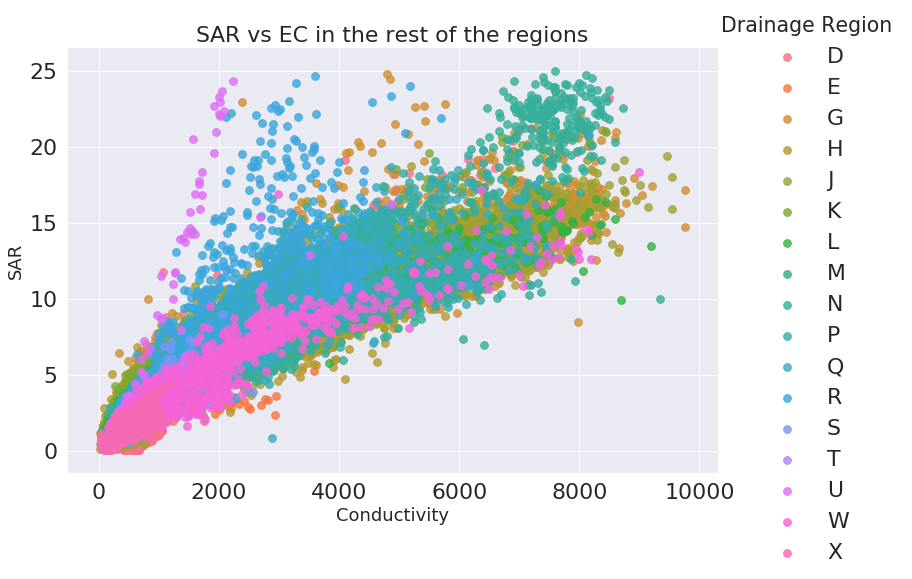

In [9]:
figsize(12, 10)

# Extract the building types
EC_SAR["Drainage Region"]=regions_without_A_B_C_V.dropna(subset=["SAR"])["Drainage Region"]
# Use seaborn to plot a scatterplot of EC vs SAR
ax=sns.lmplot(x='EC (μS/cm)', y='SAR', 
          hue = 'Drainage Region', data = EC_SAR,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height=7, aspect = 1.5);

# Plot labeling
plt.xlabel("Conductivity", size = 18)
plt.ylabel('SAR', size = 18)
plt.title('SAR vs EC in the rest of the regions', size = 22)

Without regions A, B, C, and V, the linear relationship between SAR and electrical conductivity improves.

### Correlation matrices

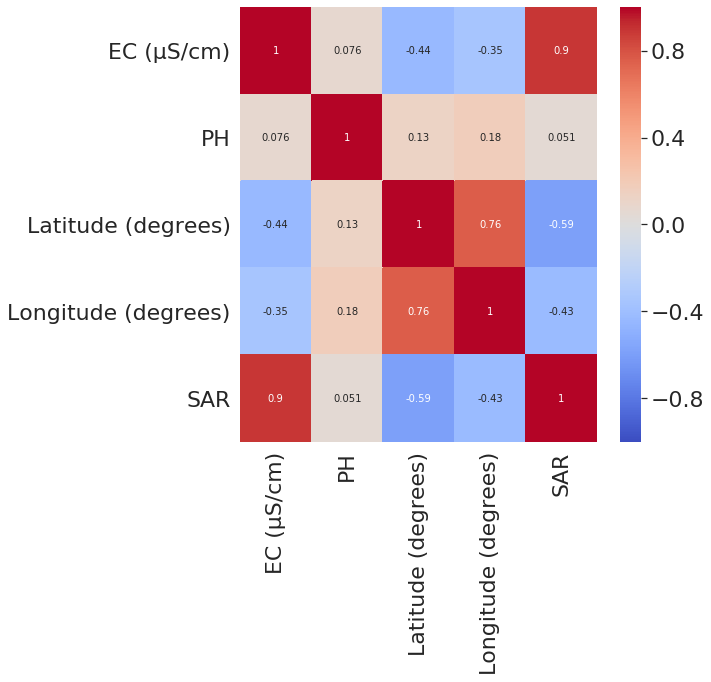

In [10]:
#Linear relationships
# Correlation matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(features_target.corr(),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

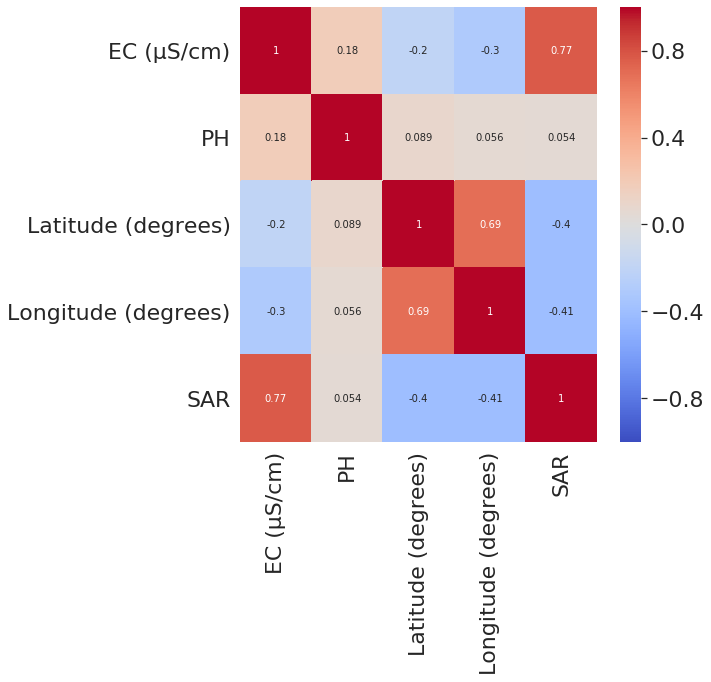

In [11]:
#Other type of correlations
# Correlation matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(features_target.corr(method="spearman"),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

There is a very strong linear relationship between SAR and electrical conductivity and a strong linear relationship between SAR and latitude.

### Pairplot

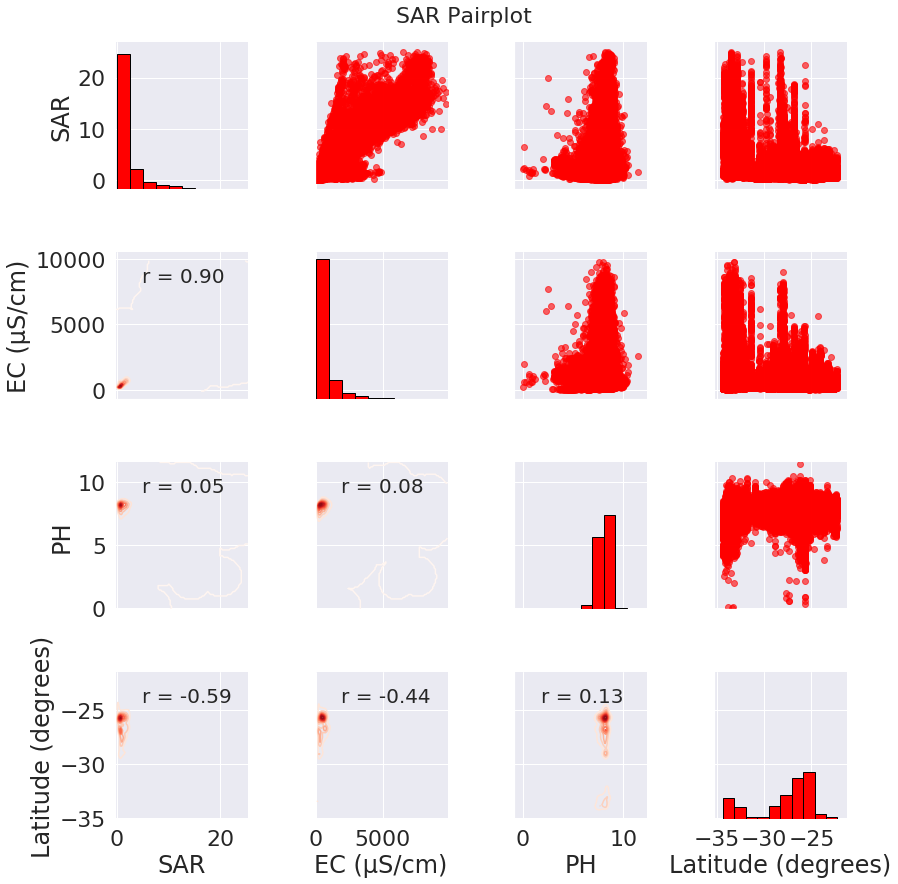

In [108]:
# Extract the columns to plot
wqi_plot=chemical_stations[["SAR", "EC (μS/cm)", "PH", "Latitude (degrees)"]]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = wqi_plot, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('SAR Pairplot', size = 22, y = 1.02);

## Predictive variables: electrical conductivity, PH and latitude

### Split Into Training and Testing Sets

In [29]:
features=chemical_stations[['EC (μS/cm)', "PH", "Latitude (degrees)", 'SAR']]

In [30]:
no_wqi = features[features['SAR'].isna()]
wqi = features[features['SAR'].notnull()]

print(no_wqi.shape)
print(wqi.shape)

(0, 4)
(197135, 4)


In [31]:
# Separate out the features and targets
features=wqi.drop(columns='SAR')
targets = pd.DataFrame(wqi['SAR'])

# Split into 80% training and 20% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(157708, 3)
(39427, 3)
(157708, 1)
(39427, 1)


### Establish a Baseline

In [32]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Calculate the median and evaluate it in the test set.
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 1.35
Baseline Performance on the test set: MAE = 1.4766


### Scaling Features

In [33]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

### Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

- Linear Regression
- Support Vector Machine Regression
- Random Forest Regression
- Gradient Boosting Regression
- K-Nearest Neighbors Regression

### Metric: MAE

In [34]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae  

In [19]:
# Linear Regression
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

# SVR
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

# Random Forest
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

# k Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

Linear Regression Performance on the test set: MAE = 0.6513
Support Vector Machine Regression Performance on the test set: MAE = 0.5361
Random Forest Regression Performance on the test set: MAE = 0.2496
Gradient Boosted Regression Performance on the test set: MAE = 0.4322
K-Nearest Neighbors Regression Performance on the test set: MAE = 0.3697


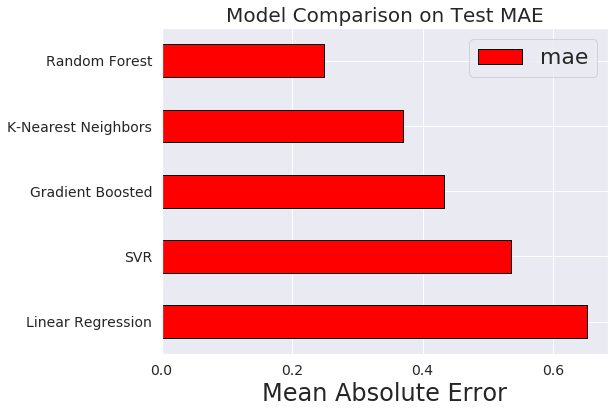

In [20]:
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', "SVR",'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

## Model Optimization
## Hyperparameter Tuning with Random Search and Cross Validation

### Random Forest

In [21]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [22]:
# Number of trees used in the process
n_estimators=[100,200,300,400, 500, 600, 700, 800, 900, 1000, 1100,1200,1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15,20,30]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8,10]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10,15,20]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                      'bootstrap': bootstrap}

In [23]:
# Create the model to use for hyperparameter tuning
rf_model = RandomForestRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
randomforest_cv = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               return_train_score=True,
                               n_jobs = -1, verbose = 2, 
                               random_state=42)

In [24]:
# Fit on the training data
randomforest_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 60.0min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

#### Best hyperparameters

In [25]:
randomforest_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

The best random forest model has the following hyperparameters:
- bootstrap=True,
- n_estimators=100,
- max_depth=30,
- min_samples_leaf=1,
- min_samples_split=15,
- max_features="auto"

We will use grid search with a grid that only has the n_estimators hyperparameter.

In [26]:
## Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900,1000,1100]}

model = RandomForestRegressor(bootstrap=True, max_depth = 30,
                                  min_samples_leaf = 1,
                                  min_samples_split = 15,
                                  max_features = 'auto',
                              criterion='mse',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
rf_grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                            verbose = 2,
                           n_jobs = -1)

In [27]:
# Fit the grid search
rf_grid_search.fit(X, y)

Fitting 4 folds for each of 19 candidates, totalling 76 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed: 81.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=30,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=15,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

### Evaluate Final Model on the Test Set

In [28]:
# Default model
rf_default_model = RandomForestRegressor(random_state = 42)

# Select the best model
rf_final_model = rf_grid_search.best_estimator_

rf_final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=750, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Running Time

In [29]:
%%timeit -n 1 -r 5

# Default model
rf_default_model.fit(X, y)

57.1 s ± 4.4 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [30]:
%%timeit -n 1 -r 5

# Tuned model
rf_final_model.fit(X, y)

4min 38s ± 12.4 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [31]:
# Compare the performance of the default Random Forest Regressor to the tuned model: 

rf_default_pred = rf_default_model.predict(X_test)
rf_final_pred = rf_final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, rf_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, rf_final_pred))

Default model performance on the test set: MAE = 0.2498.
Final model performance on the test set:   MAE = 0.2462.


#### MAPE Calculation

In [32]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, rf_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')

# Calculate the MAPE for the final model:
mape=100*(mae(y_test, rf_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model -inf %.
Accuracy final model -inf %.


### Test Values and Predictions

<Figure size 576x432 with 0 Axes>

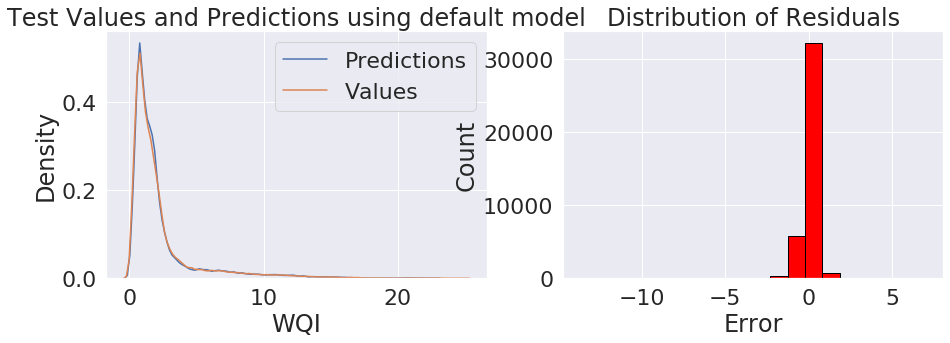

In [33]:
## Using final model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(rf_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using default model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
default_residuals = rf_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(default_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

### Gradient Boosted

In [34]:
gb = GradientBoostingRegressor()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [35]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [36]:
# Create the model to use for hyperparameter tuning
gb_model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
gb_cv = RandomizedSearchCV(estimator=gb_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [37]:
# Fit on the training data
gb_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 66.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 113.9min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

#### Best hyperparameters

In [38]:
gb_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=1100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

The best gradient boosted model has the following hyperparameters:
- loss="huber",
- n_estimators=1100,
- max_depth=10,
- min_samples_leaf=6,
- min_samples_split=10,
- max_features=None

We will use grid search with a grid that only has the n_estimators hyperparameter.

In [39]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,900,1000,1100]}

gb_model = GradientBoostingRegressor(loss = 'huber', max_depth = 10,
                                  min_samples_leaf = 6,
                                  min_samples_split = 10,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
gb_grid_search = GridSearchCV(estimator = gb_model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [40]:
gb_grid_search.fit(X, y)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 101.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=10,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=10,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i...e,
                          

### Evaluate Final Model on the Test Set

In [7]:
# Default model
gb_default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
gb_final_model = gb_grid_search.best_estimator_

gb_final_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=900,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### Running Time

In [42]:
%%timeit -n 1 -r 5

# Default model
gb_default_model.fit(X, y)

11.2 s ± 177 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [43]:
%%timeit -n 1 -r 5

# Tuned model
gb_final_model.fit(X, y)

6min 51s ± 1.88 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [44]:
# Compare the performance of the default Gradient Boosting Regressor to the tuned model: 

gb_default_pred = gb_default_model.predict(X_test)
gb_final_pred = gb_final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, gb_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, gb_final_pred))

Default model performance on the test set: MAE = 0.4322.
Final model performance on the test set:   MAE = 0.2263.


In [45]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, gb_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')

# Calculate the MAPE for the final model:
mape=100*(mae(y_test, gb_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model -inf %.
Accuracy final model -inf %.


### Test Values and Predictions

<Figure size 576x432 with 0 Axes>

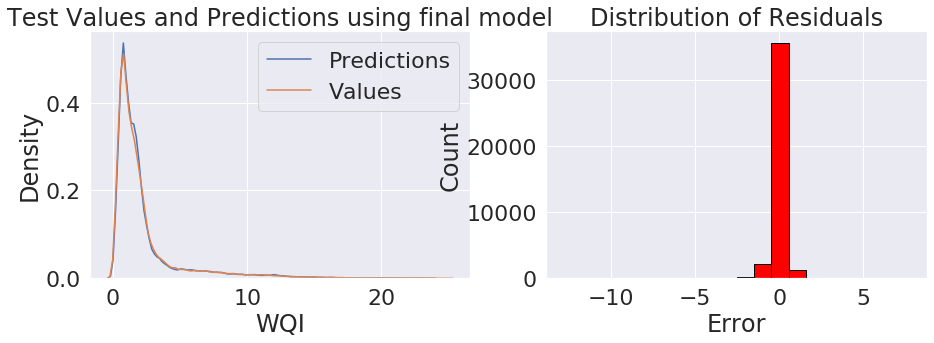

In [46]:
## Using final model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(gb_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = gb_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## Linear Regression

In [47]:
lr=LinearRegression()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(lr.get_params())

Parameters currently in use:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [48]:
%%timeit -n 1 -r 5

#Fit on the training data
lr.fit(X,y)

The slowest run took 33.41 times longer than the fastest. This could mean that an intermediate result is being cached.
88.1 ms ± 153 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [49]:
lr_pred=lr.predict(X_test)

print("Linear Regression Full Results: MAE= %0.4f." %mae(y_test, lr_pred))

Linear Regression Full Results: MAE= 0.6513.


In [50]:
predicted = lr.predict(X_test)
r2_value = lr.score(X, y)
rmsd = np.sqrt(mae(y_test, predicted))
print("Slope(b1): \n", lr.coef_)
print("Y Intercept(b0): \n", lr.intercept_)
print("Root Mean Square Deviation: \n", rmsd)
print("R^2 value: \n", r2_value)
print("Prediction over test data: \n", predicted)

Slope(b1): 
 [20.87939525  1.21028263 -2.73675332]
Y Intercept(b0): 
 0.9923970535667035
Root Mean Square Deviation: 
 0.8070502527126341
R^2 value: 
 0.8547037829942087
Prediction over test data: 
 [1.51316661 2.1258911  1.04421705 ... 0.97800127 0.42130942 1.00476451]


#### MAPE Calculation

In [51]:
mape=100*(mae(y_test, lr_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy final model -inf %.


### Test Values and Predictions

<Figure size 576x432 with 0 Axes>

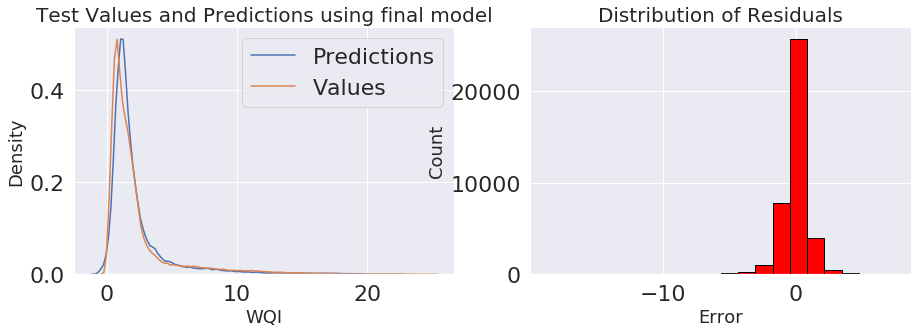

In [52]:
## Using final model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(lr_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI', size=18); plt.ylabel('Density', size=18);
plt.title('Test Values and Predictions using final model', size=20);

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = lr_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error', size=18); plt.ylabel('Count', size=18)
plt.title('Distribution of Residuals', size=20);

## K-Nearest Neighbors

In [53]:
knn = KNeighborsRegressor()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(knn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [54]:
# Number of neighbors used in the process
n_neighbors=[2,3,4,5,10,15,20,30]

#p values
p=[1,2,5]

hyperparameter_grid={'n_neighbors':n_neighbors, 'p':p}

In [55]:
# Create the model to use for hyperparameter tuning
knn_model=KNeighborsRegressor()

# Set up the random search with 4-fold cross validation
knn_cv=RandomizedSearchCV(estimator=knn_model, 
                          param_distributions=hyperparameter_grid,
                         cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [56]:
# Fit on the training data
knn_cv.fit(X,y)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 10, 15, 20,
                                                        30],
                                        'p': [1, 2, 5]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

#### Best hyperparameters

In [57]:
knn_cv.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='uniform')

In [58]:
knn_model=KNeighborsRegressor()
                             
params_grid={"n_neighbors": [2,3,4,5,10,15,20], "p":[1,2,5]}
knn_grid_search=GridSearchCV(estimator=knn_model, param_grid=params_grid, cv=4,
                            verbose=1,
                            n_jobs=-1)

In [59]:
# Fit the grid search
knn_grid_search.fit(X,y)

Fitting 4 folds for each of 21 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   36.6s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 10, 15, 20],
                         'p': [1, 2, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

### Evaluate Final Model on the Test Set

In [60]:
# Default model
knn_default_model = KNeighborsRegressor()

# Select the best model
knn_final_model = knn_grid_search.best_estimator_

knn_final_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                    weights='uniform')

#### Running Time

In [61]:
%%timeit -n 1 -r 5

# Default model
knn_default_model.fit(X, y)

130 ms ± 7.98 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [62]:
%%timeit -n 1 -r 5

# Tuned model
knn_final_model.fit(X, y)

121 ms ± 7.99 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [63]:
# Compare the performance of the default KNN-Neighbors Regressor to the tuned model: 

knn_default_pred = knn_default_model.predict(X_test)
knn_final_pred = knn_final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, knn_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, knn_final_pred))

Default model performance on the test set: MAE = 0.3670.
Final model performance on the test set:   MAE = 0.3489.


#### MAPE Calculation

In [64]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, knn_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')
# Calculate the MAPE for the final model:
mape=100*(mae(y_test, knn_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model -inf %.
Accuracy final model -inf %.


### Test Values and Predictions

<Figure size 576x432 with 0 Axes>

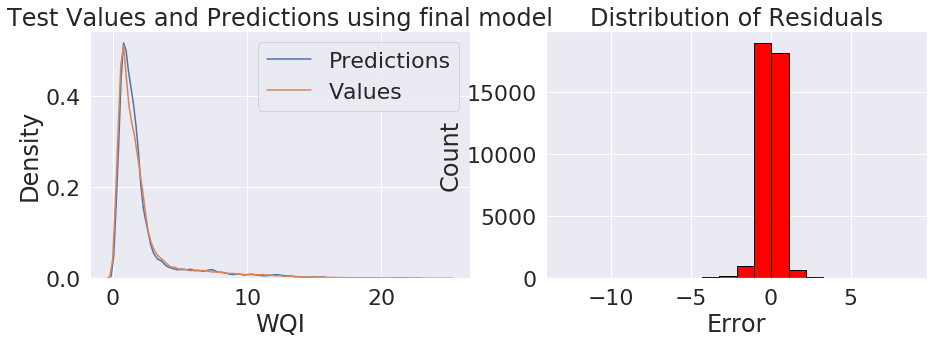

In [65]:
fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(knn_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = knn_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## Recreate Final Model

In [35]:
# The final model chosen is:
final_model_chosen=GradientBoostingRegressor(loss="huber", max_depth=10, max_features=None, 
                                            min_samples_leaf=6, min_samples_split=10, 
                                             n_estimators=900, random_state=42)
final_model_chosen.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=900,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
# Make predictions on the test set:
model_pred_chosen=final_model_chosen.predict(X_test)
print("Final Model Performance on the test set: MAE= %0.4f" %mae(y_test, model_pred_chosen))

Final Model Performance on the test set: MAE= 0.2263


### Overfitting?

In [37]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,900,1000,1100]}

gb_model = GradientBoostingRegressor(loss = 'huber', max_depth = 10,
                                  min_samples_leaf = 6,
                                  min_samples_split = 10,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
gb_grid_search = GridSearchCV(estimator = gb_model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

gb_grid_search.fit(X, y)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 46.6min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 115.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=10,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=10,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i...e,
                          

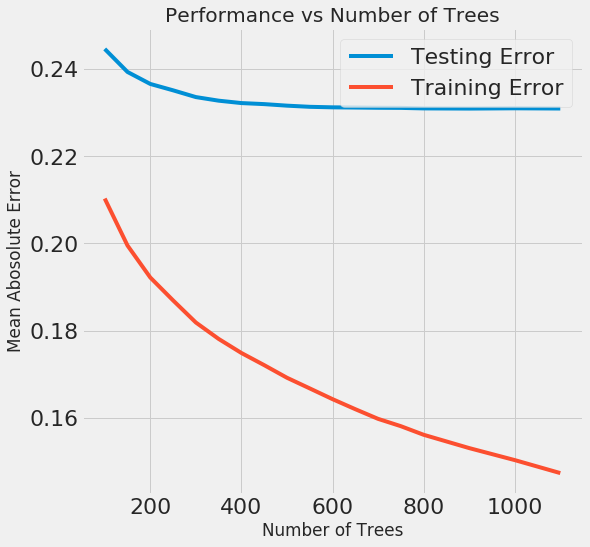

In [38]:
# Get the results into a dataframe
results = pd.DataFrame(gb_grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [39]:
results.sort_values('mean_test_score', ascending = True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,73.838067,0.265854,0.269490,0.004109,100,{'n_estimators': 100},-0.246591,-0.245939,-0.242758,-0.243078,-0.244592,0.001693,18,-0.211484,-0.209900,-0.210958,-0.208849,-0.210298,0.001012
1,105.162174,0.476647,0.361423,0.004292,150,{'n_estimators': 150},-0.240692,-0.240331,-0.238916,-0.237329,-0.239317,0.001326,17,-0.199179,-0.198713,-0.201953,-0.198287,-0.199533,0.001433
2,137.218525,0.510065,0.461792,0.010972,200,{'n_estimators': 200},-0.237739,-0.238207,-0.235312,-0.235021,-0.236570,0.001417,16,-0.191467,-0.191765,-0.194296,-0.191271,-0.192200,0.001223
3,168.272588,0.476649,0.543024,0.016121,250,{'n_estimators': 250},-0.236110,-0.236913,-0.233843,-0.233567,-0.235108,0.001435,15,-0.185801,-0.186528,-0.189270,-0.186220,-0.186955,0.001361
4,199.560196,0.627643,0.638226,0.010209,300,{'n_estimators': 300},-0.234485,-0.235428,-0.232192,-0.232132,-0.233559,0.001437,14,-0.180587,-0.181737,-0.183408,-0.181824,-0.181889,0.001003


The model is overfitting. I address overfitting decreasing the complexity of the model through the hyperparameters.

### Gradient Boosted
   ##### Option 1: Trees: 900, max_depth=7, min_samples_leaf=10

In [40]:
# Create a range of trees to evaluate
trees_grid1 = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,900]}

gb_model1 = GradientBoostingRegressor(loss = 'huber', max_depth = 7,
                                  min_samples_leaf = 6,
                                  min_samples_split = 10,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
gb_grid_search1 = GridSearchCV(estimator = gb_model1, param_grid=trees_grid1, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

gb_grid_search1.fit(X,y)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed: 60.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=7,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=10,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_it...change=None,
                

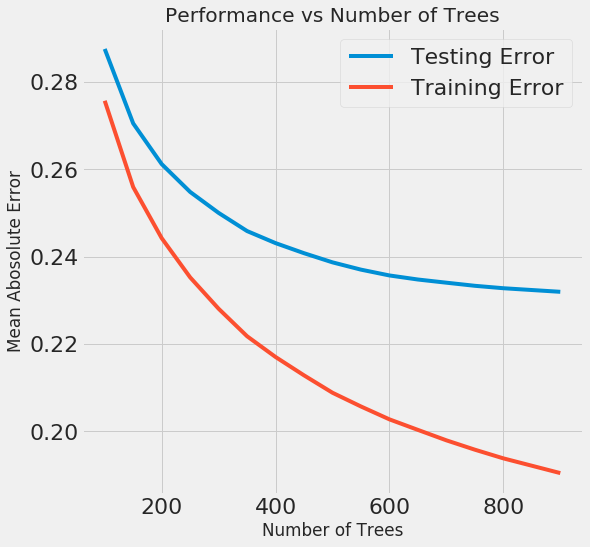

In [41]:
# Get the results into a dataframe
results1 = pd.DataFrame(gb_grid_search1.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results1['param_n_estimators'], -1 * results1['mean_test_score'], label = 'Testing Error')
plt.plot(results1['param_n_estimators'], -1 * results1['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [42]:
final_model1=GradientBoostingRegressor(loss="huber", max_depth=5, max_features=None, 
                                            min_samples_leaf=10, min_samples_split=10, 
                                             n_estimators=900, random_state=42)

In [43]:
%%timeit -n 1 -r 5

final_model1.fit(X,y)

4min 1s ± 4.92 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [44]:
# Make predictions on the test set:
model_pred1=final_model1.predict(X_test)
print("Final Model Performance on the test set: MAE= %0.4f" %mae(y_test, model_pred1))

# Calculate the MAPE for the final model:
mape=100*(mae(y_test, model_pred1)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Final Model Performance on the test set: MAE= 0.2412
Accuracy final model -inf %.


<Figure size 576x576 with 0 Axes>

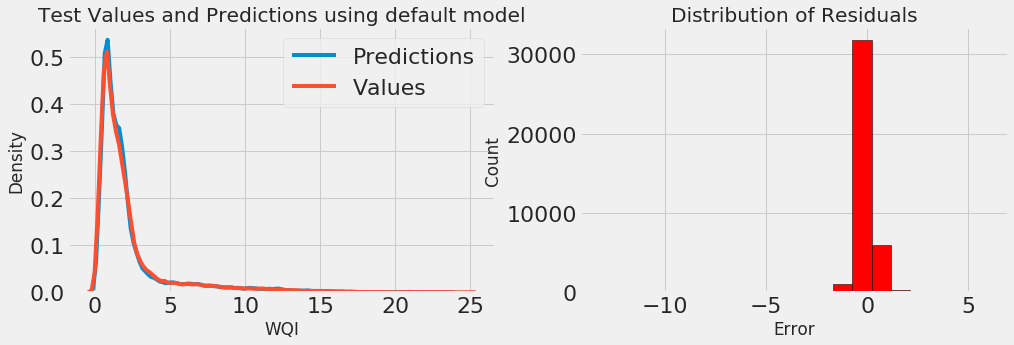

In [45]:
fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(model_pred1, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using default model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
default_residuals = model_pred1 - y_test
# Plot the residuals in a histogram
plt.hist(default_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

### Gradient Boosted
   ##### Option 2: Trees: 900, max_depth=5, min_samples_leaf=10

In [46]:
# Create a range of trees to evaluate
trees_grid2 = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,900]}

gb_model2 = GradientBoostingRegressor(loss = 'huber', max_depth = 5,
                                  min_samples_leaf = 10,
                                  min_samples_split = 10,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
gb_grid_search2 = GridSearchCV(estimator = gb_model2, param_grid=trees_grid2, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

gb_grid_search2.fit(X,y)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed: 47.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=10,
                                                 min_samples_split=10,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i...change=None,
                

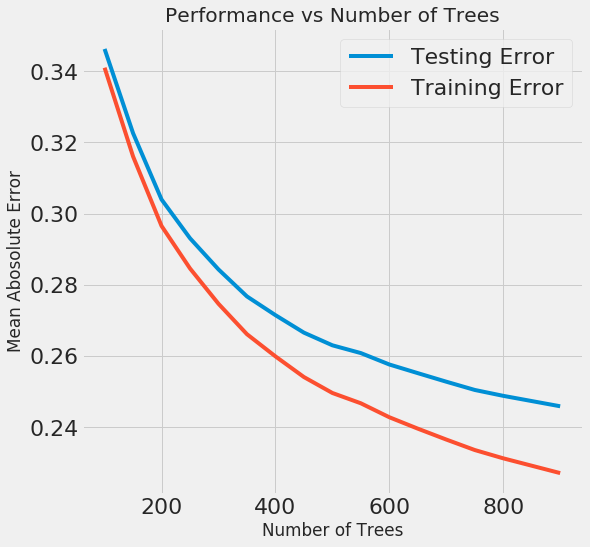

In [47]:
# Get the results into a dataframe
results2 = pd.DataFrame(gb_grid_search2.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results2['param_n_estimators'], -1 * results2['mean_test_score'], label = 'Testing Error')
plt.plot(results2['param_n_estimators'], -1 * results2['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [62]:
final_model2=GradientBoostingRegressor(loss="huber", max_depth=5, max_features=None, 
                                            min_samples_leaf=10, min_samples_split=10, 
                                             n_estimators=750, random_state=42)

In [63]:
%%timeit -n 1 -r 5

final_model2.fit(X,y)

3min 15s ± 6.46 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [64]:
# Make predictions on the test set:
model_pred2=final_model2.predict(X_test)
print("Final Model Performance on the test set: MAE= %0.4f" %mae(y_test, model_pred2))

# Calculate the MAPE for the final model:
mape=100*(mae(y_test, model_pred2)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Final Model Performance on the test set: MAE= 0.2461
Accuracy final model -inf %.


<Figure size 576x576 with 0 Axes>

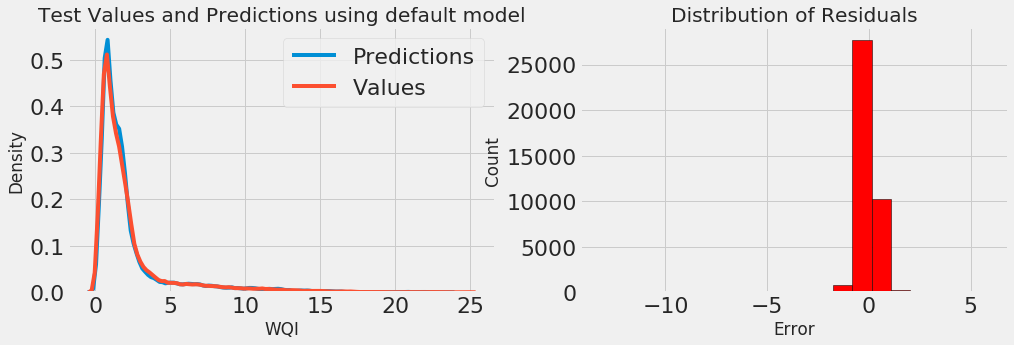

In [65]:
fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(model_pred2, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using default model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
default_residuals = model_pred2 - y_test
# Plot the residuals in a histogram
plt.hist(default_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

### Gradient Boosted
   ##### Option 3: Trees: 900, max_depth=3, min_samples_leaf=10

In [52]:
# Create a range of trees to evaluate
trees_grid3 = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,900]}

gb_model3 = GradientBoostingRegressor(loss = 'huber', max_depth = 3,
                                  min_samples_leaf = 10,
                                  min_samples_split = 10,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
gb_grid_search3 = GridSearchCV(estimator = gb_model3, param_grid=trees_grid3, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

gb_grid_search3.fit(X,y)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed: 32.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=10,
                                                 min_samples_split=10,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i...change=None,
                

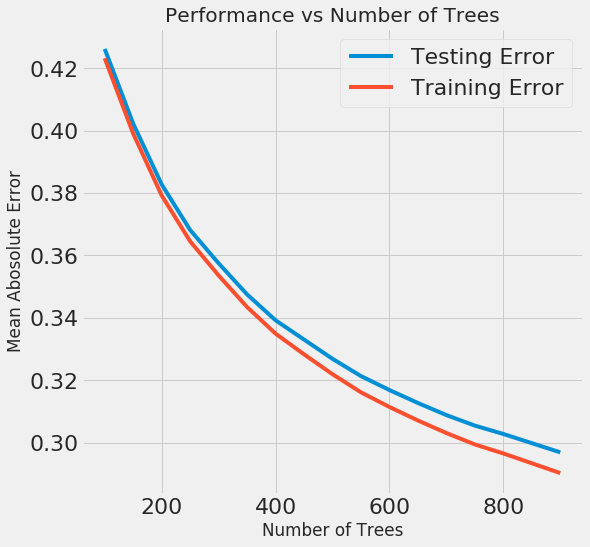

In [53]:
# Get the results into a dataframe
results3= pd.DataFrame(gb_grid_search3.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results3['param_n_estimators'], -1 * results3['mean_test_score'], label = 'Testing Error')
plt.plot(results3['param_n_estimators'], -1 * results3['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [58]:
final_model3=GradientBoostingRegressor(loss="huber", max_depth=3, max_features=None, 
                                            min_samples_leaf=10, min_samples_split=10, 
                                             n_estimators=750, random_state=42)

In [59]:
%%timeit -n 1 -r 5

final_model3.fit(X,y)

2min 13s ± 6 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [60]:
# Make predictions on the test set:
model_pred3=final_model3.predict(X_test)
print("Final Model Performance on the test set: MAE= %0.4f" %mae(y_test, model_pred3))

# Calculate the MAPE for the final model:
mape=100*(mae(y_test, model_pred3)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Final Model Performance on the test set: MAE= 0.3087
Accuracy final model -inf %.


<Figure size 576x576 with 0 Axes>

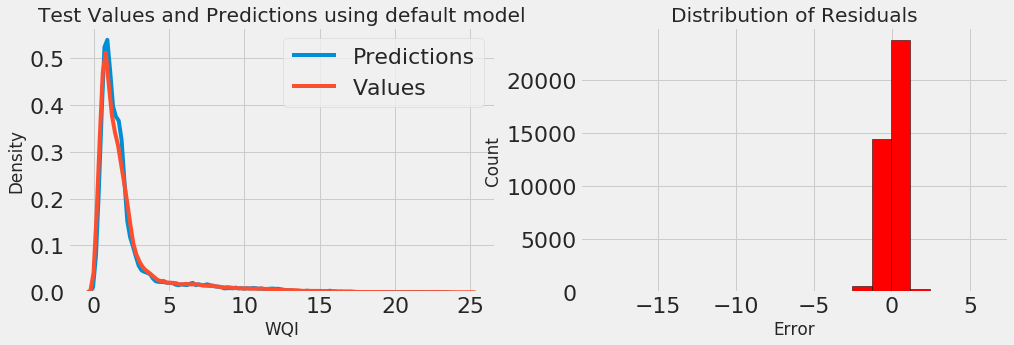

In [61]:
fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(model_pred3, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using default model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
default_residuals = model_pred3 - y_test
# Plot the residuals in a histogram
plt.hist(default_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

The model with option 2 parameters drastically reduces overfitting in exchange for worsening the MAE by 9%. Even so, I consider it to be the best option.